#Loan Approval Prediction

##Feature Descriptions
person_age: Applicant’s age in years.

person_income: Annual income of the applicant in USD.

person_home_ownership: Status of homeownership (e.g., Rent, Own, Mortgage).

person_emp_length: Length of employment in years.

loan_intent: Purpose of the loan (e.g., Education, Medical, Personal).

loan_grade: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.

loan_amnt: Total loan amount requested by the applicant.

loan_int_rate: Interest rate associated with the loan.

loan_percent_income: Percentage of the applicant’s income allocated towards loan repayment.

cb_person_default_on_file: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).

cb_person_cred_hist_length: Length of the applicant’s credit history in years.

loan_status: The approval status of the loan (approved or not approved).

## Importing packages

In [366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('magma')
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix , roc_curve, auc

## Reading dataset

In [367]:
df = pd.read_csv('train.csv')

In [368]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [369]:
df.shape

(58645, 13)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [371]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [372]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


## Checking Null/Duplicated values

In [373]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [374]:
df.duplicated().sum()

np.int64(0)

In [375]:
df.drop('id', axis=1, inplace=True)

## Binning age

In [376]:
def age_group(age):
    if age <= 30:
        return "Early Career"
    elif age <= 40:
        return "Mid-Career"
    elif age <= 50:
        return "Prime Career"
    elif age <= 60:
        return "Pre-Retirement"
    else:
        return "Retirement Age"

In [377]:
df['age_group'] = df['person_age'].apply(age_group)

## Data Visualization

In [378]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = [col for col in df.columns if col not in cat_cols and col != 'loan_status']

<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = True , palette=colors[0])
<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = True , palette=colors[0])
<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = True , palette=colors[0])
<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = True , palette=colors[0])
<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = True , palette=colors[0])
<ipython-input-379-6e068115af8d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=col, fill = 

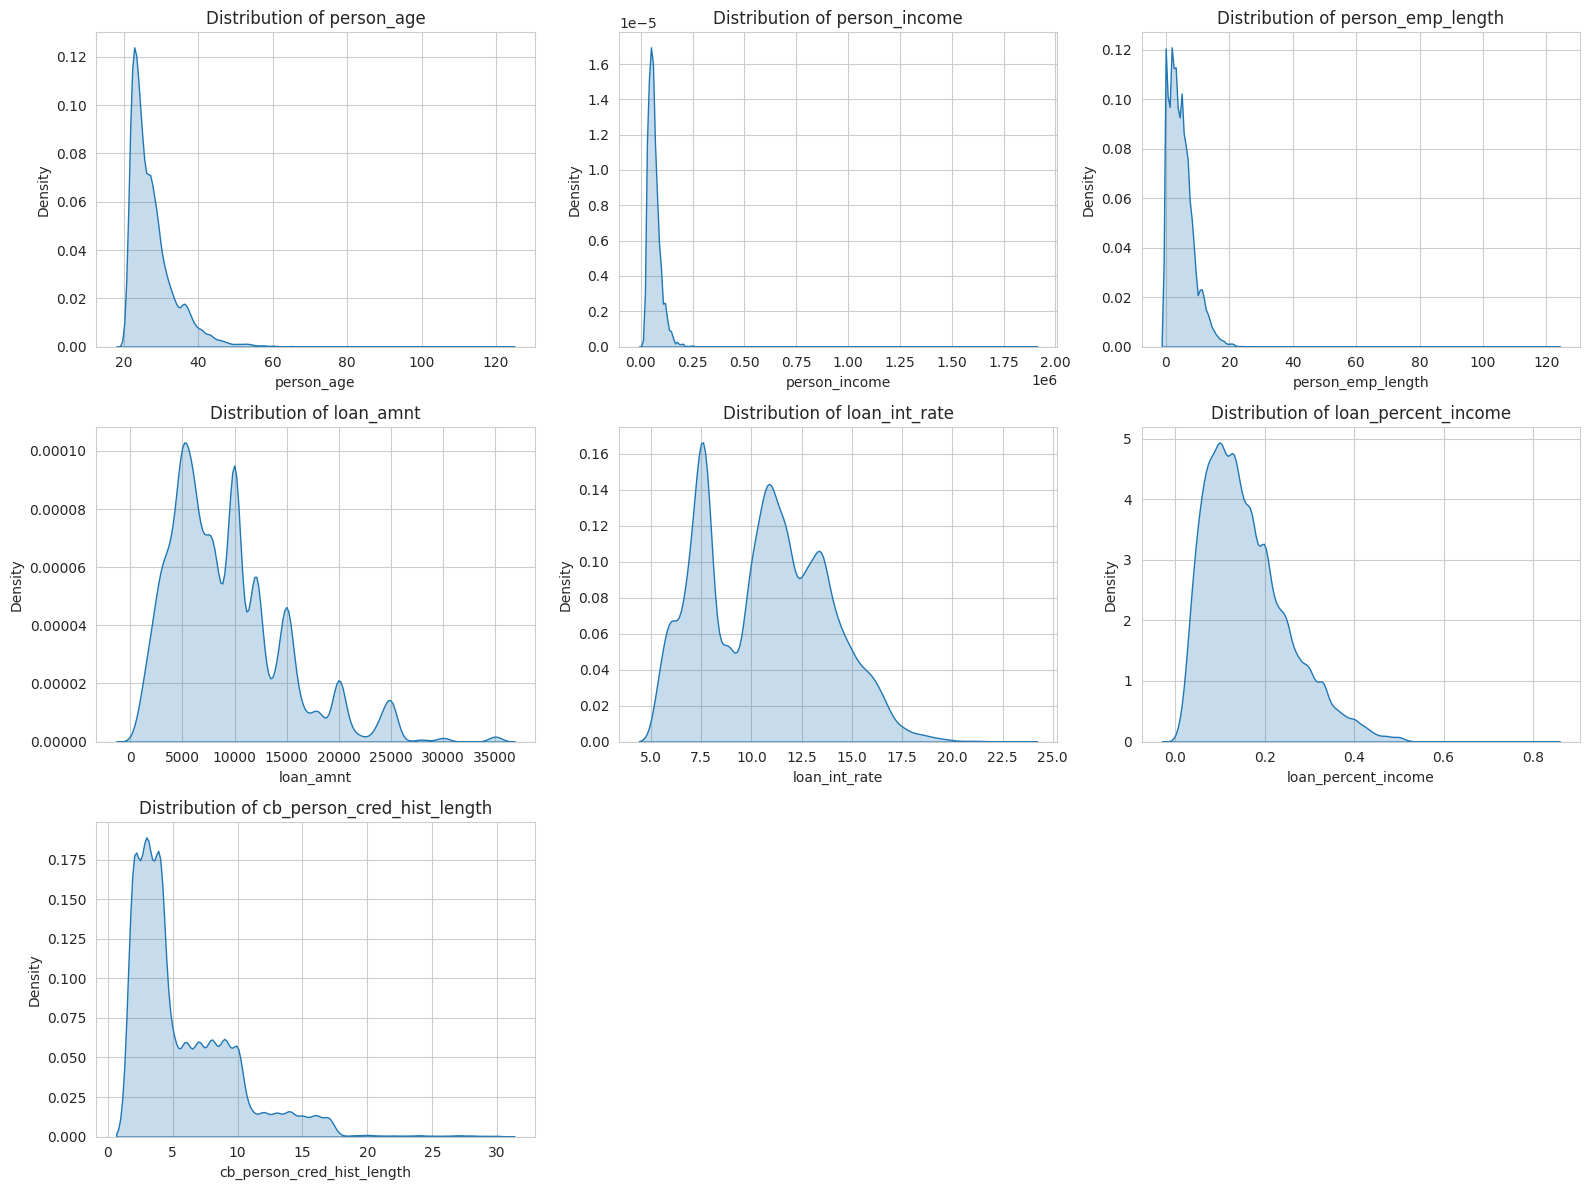

In [379]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df, x=col, fill = True , palette=colors[0])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Most distributions are positively skewd

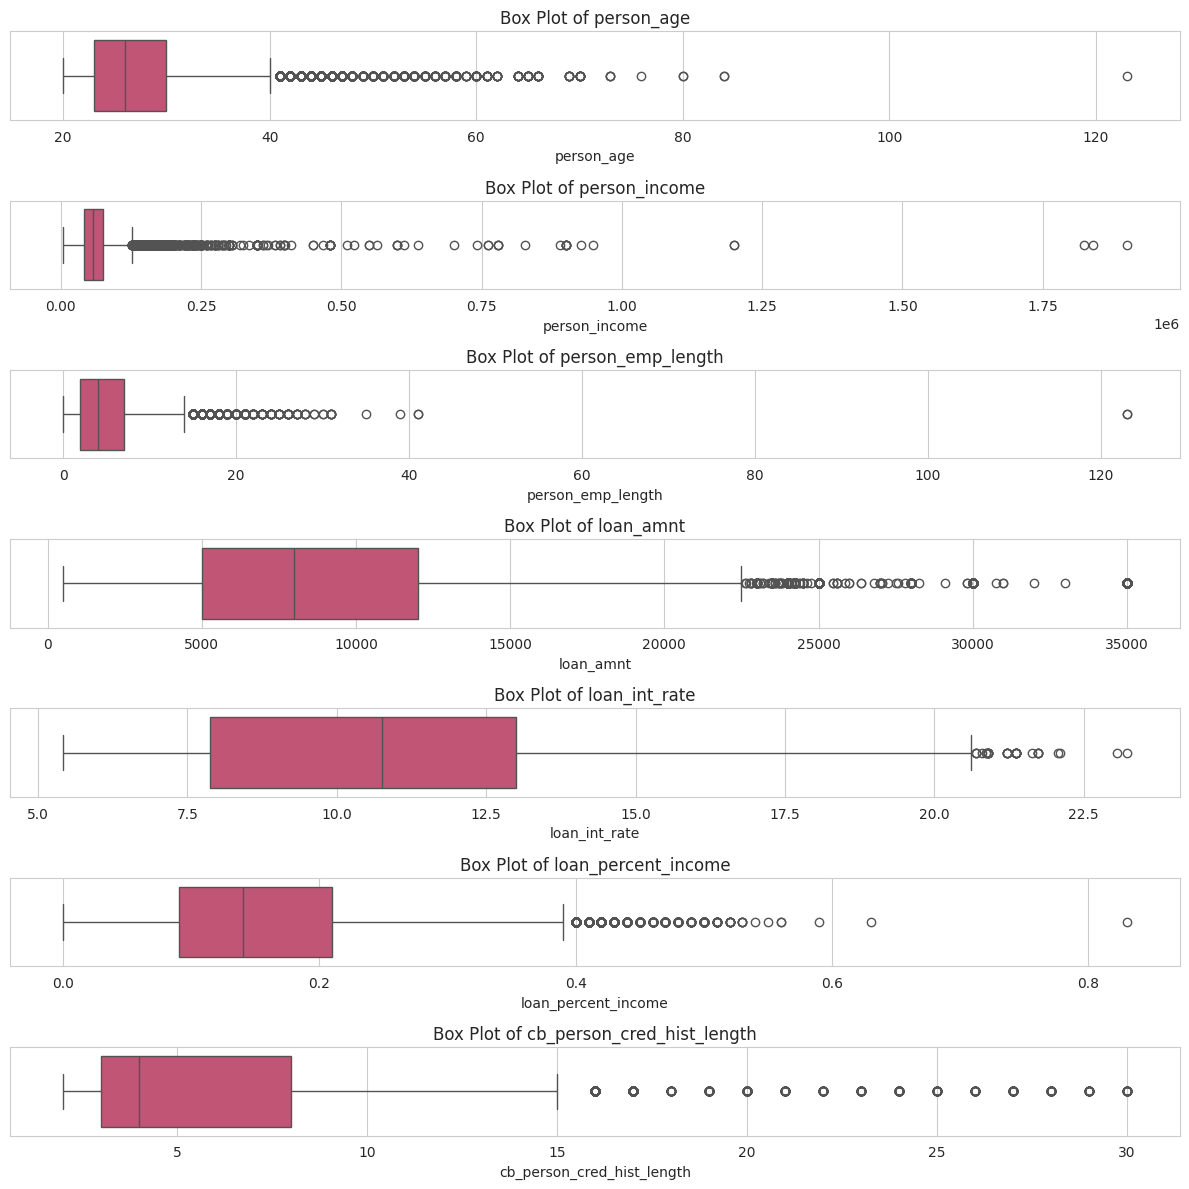

In [380]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(7, 1, i+1)
    sns.boxplot(df, x=col, color=colors[3])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()

Extreme outliers appear in person_age , person_income , person_emp_length

In [381]:
df['person_age'] = df['person_age'].clip(upper=80)
df['person_emp_length'] = df['person_emp_length'].clip(upper=60)

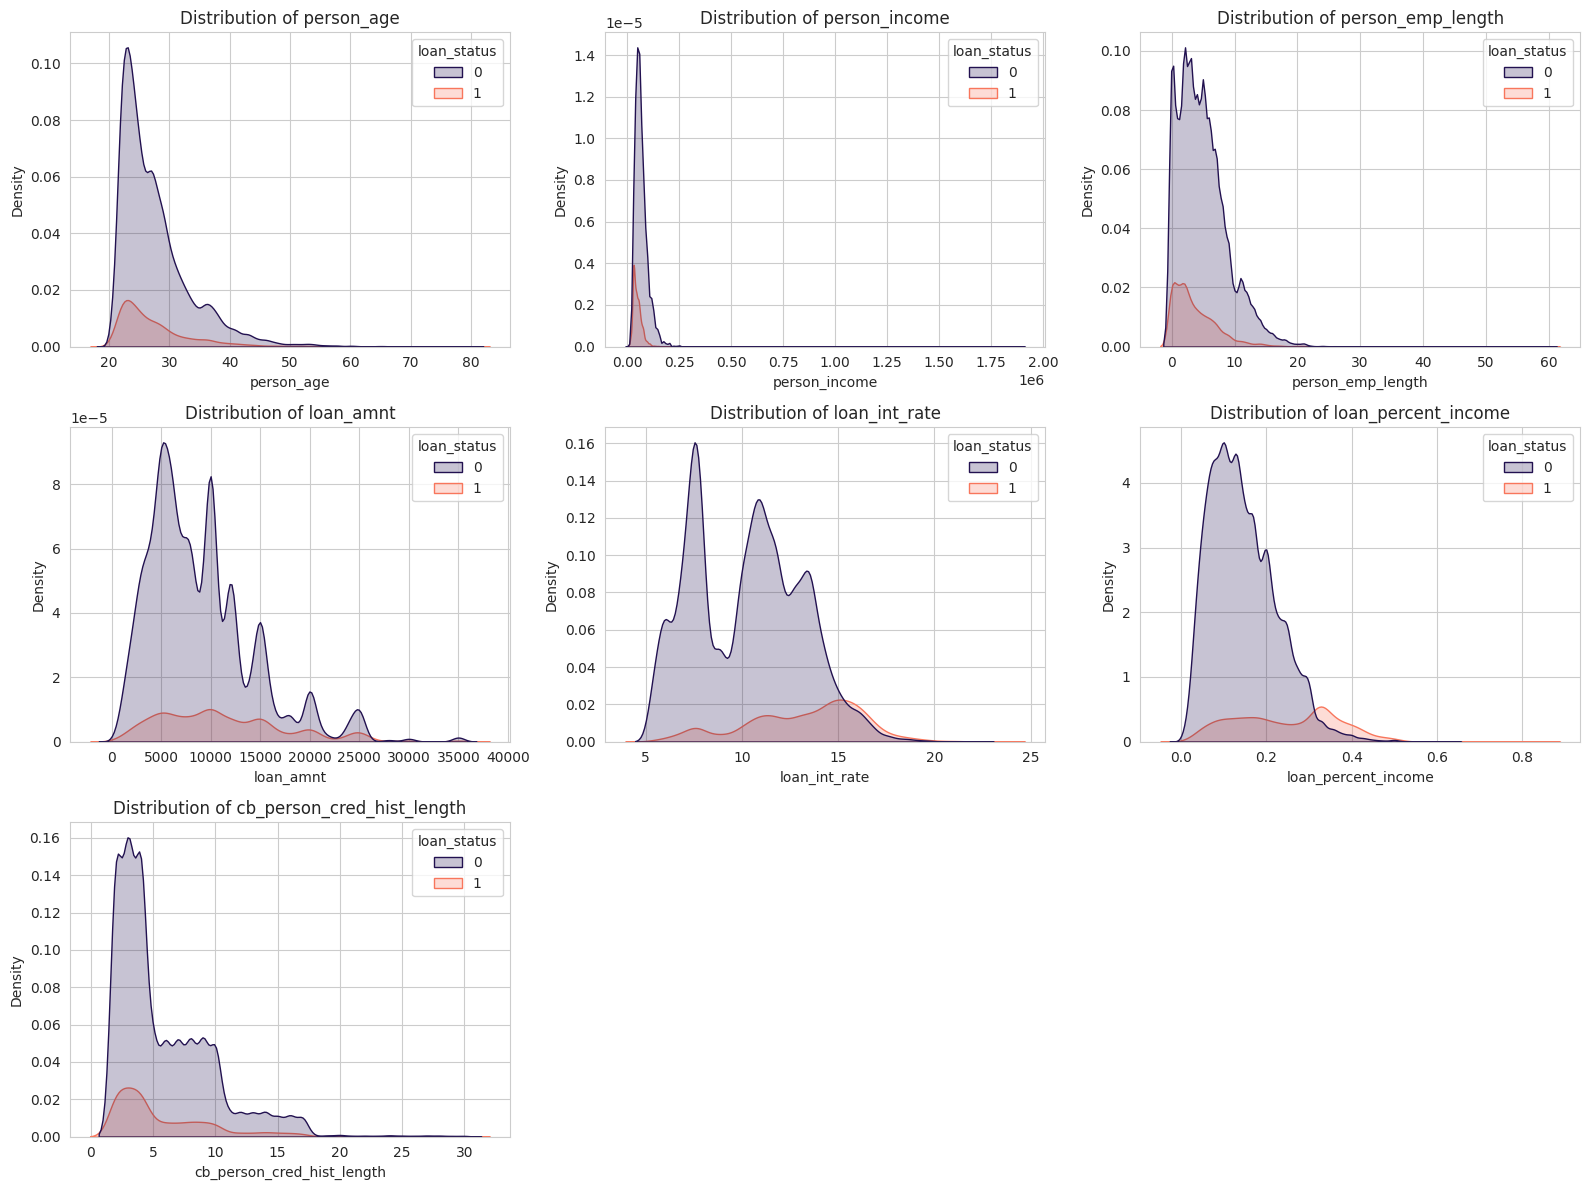

In [382]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df, x=col, fill = True , hue = 'loan_status', palette=[colors[0] , colors[4]])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

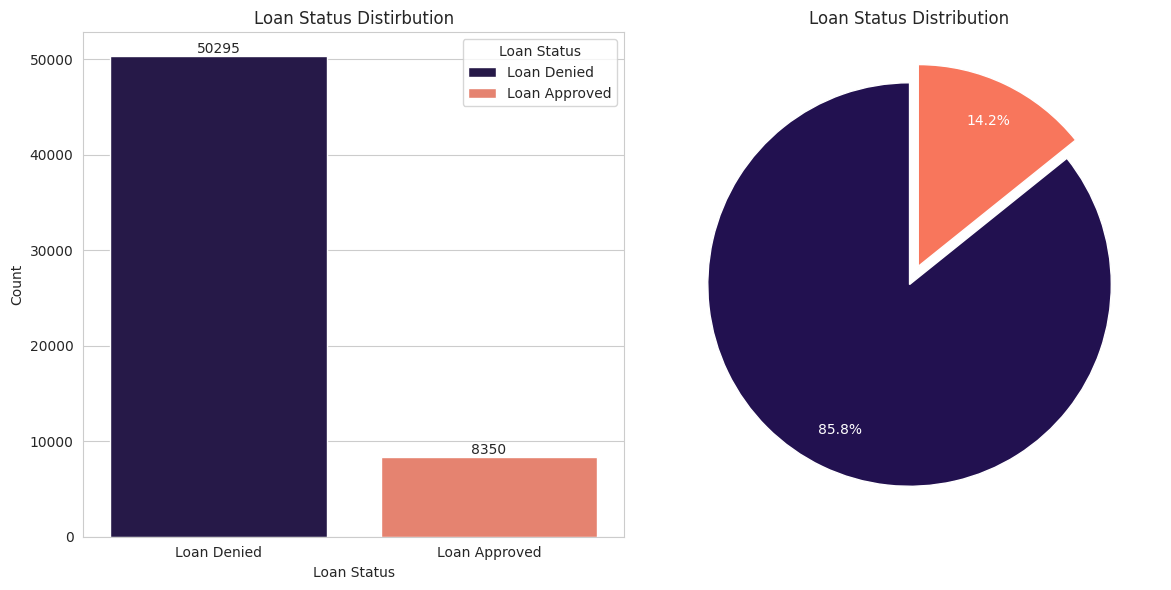

In [383]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(df, x='loan_status' , hue = 'loan_status' , palette=[colors[0] , colors[4]])
for ax in fig.containers:
    fig.bar_label(ax)
plt.title('Loan Status Distirbution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Loan Status' , labels=['Loan Denied' , 'Loan Approved'])
plt.xticks([0 , 1] , ['Loan Denied' , 'Loan Approved'])

plt.subplot(1, 2, 2)
plt.pie(df['loan_status'].value_counts(), labels=['Loan Denied', 'Loan Approved'], autopct='%1.1f%%' , explode=[0 , 0.1] , colors=[colors[0] , colors[4]] ,pctdistance=0.8,startangle=90 , textprops={'color':"w"})
plt.title('Loan Status Distribution')
plt.tight_layout()

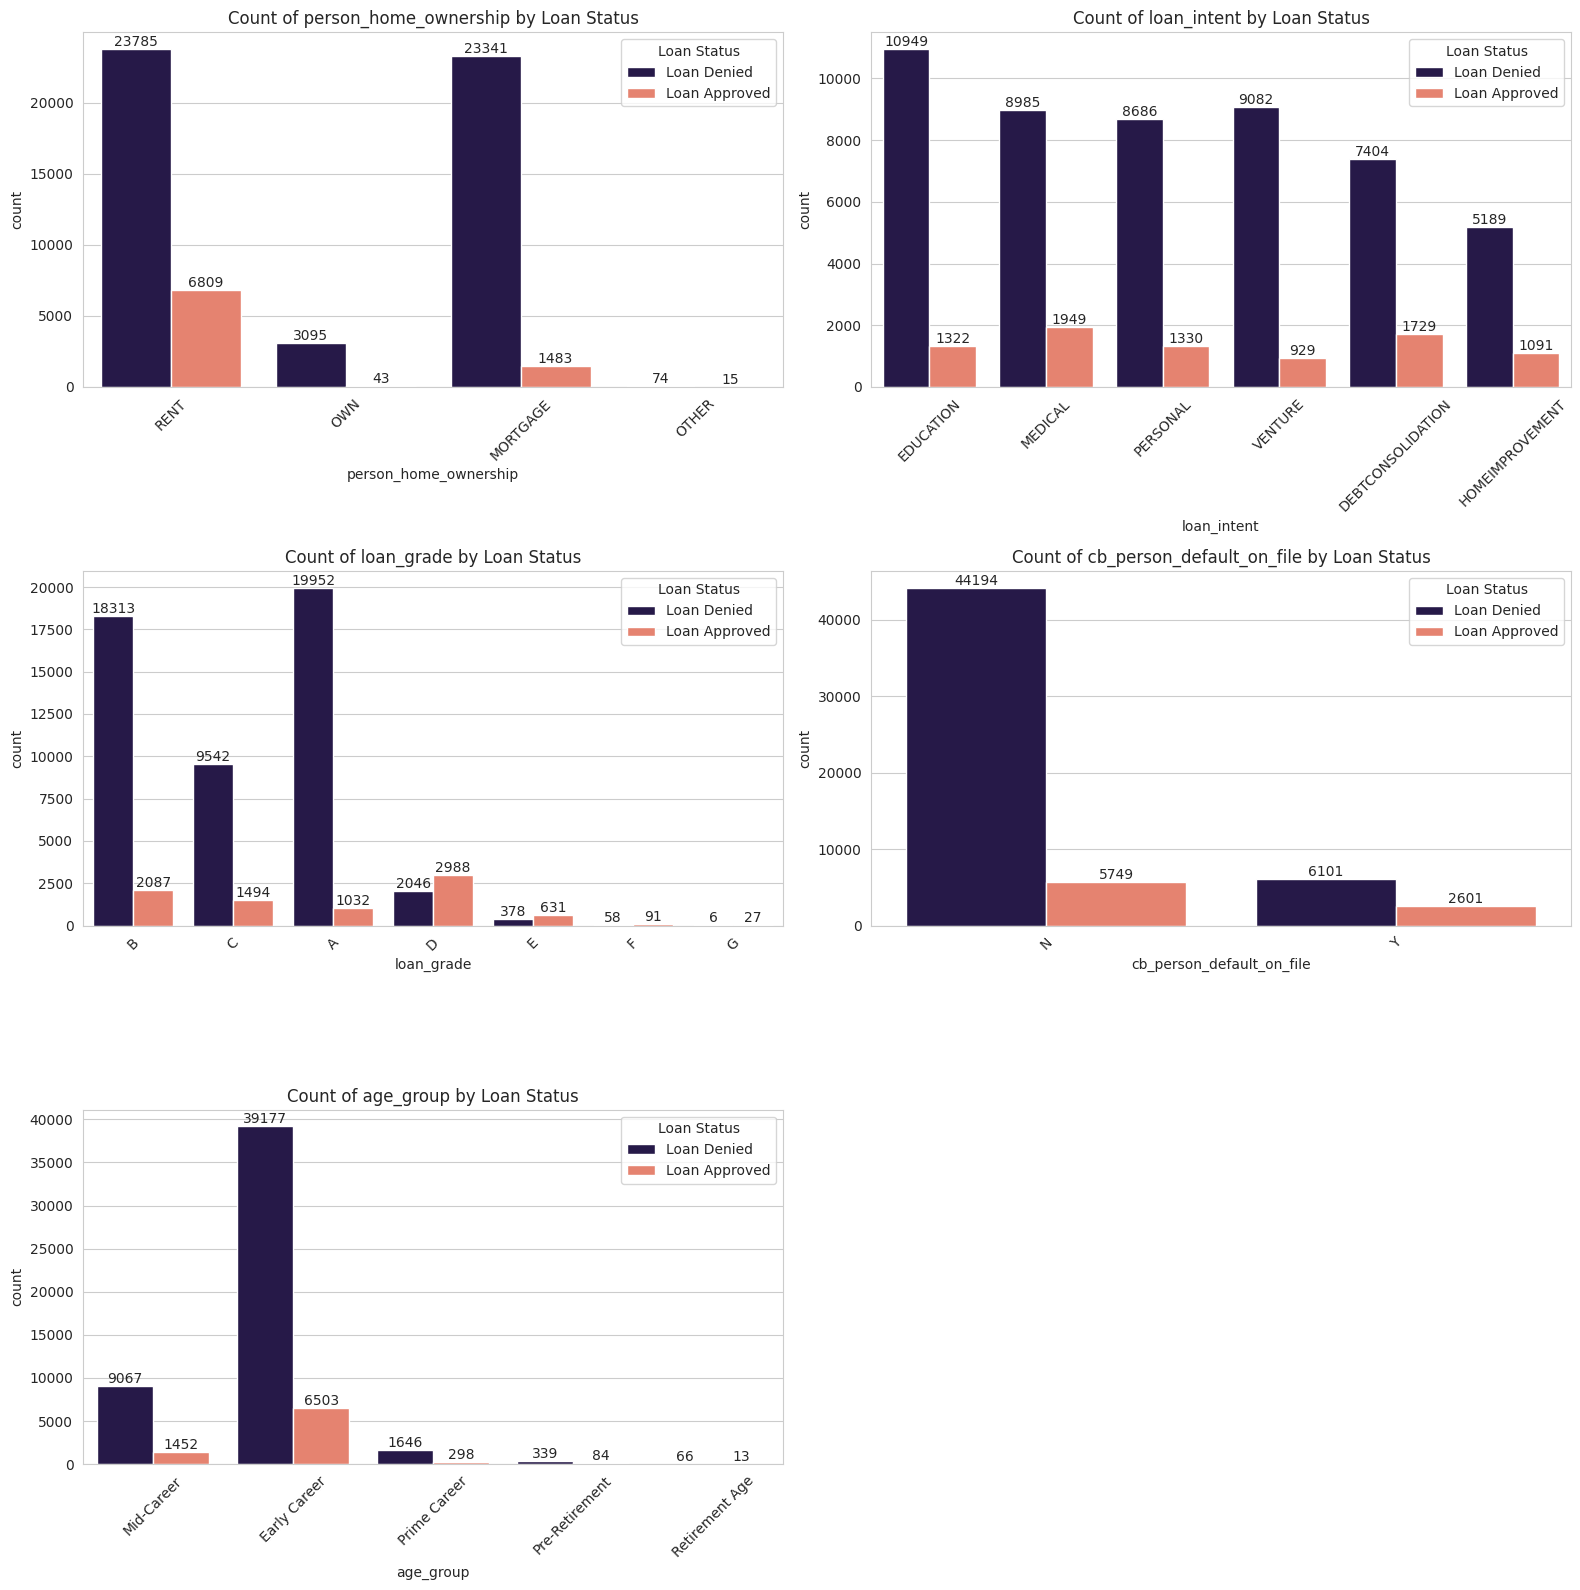

In [384]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    fig = sns.countplot(df, x=col, hue='loan_status', palette=[colors[0], colors[4]])
    for ax in fig.containers:
        fig.bar_label(ax)
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status', labels=['Loan Denied', 'Loan Approved'])
    plt.title(f'Count of {col} by Loan Status')
plt.tight_layout()

<ipython-input-385-02846f536ddf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='person_income', palette=[colors[1], colors[4]])


Text(0, 0.5, 'Person Income')

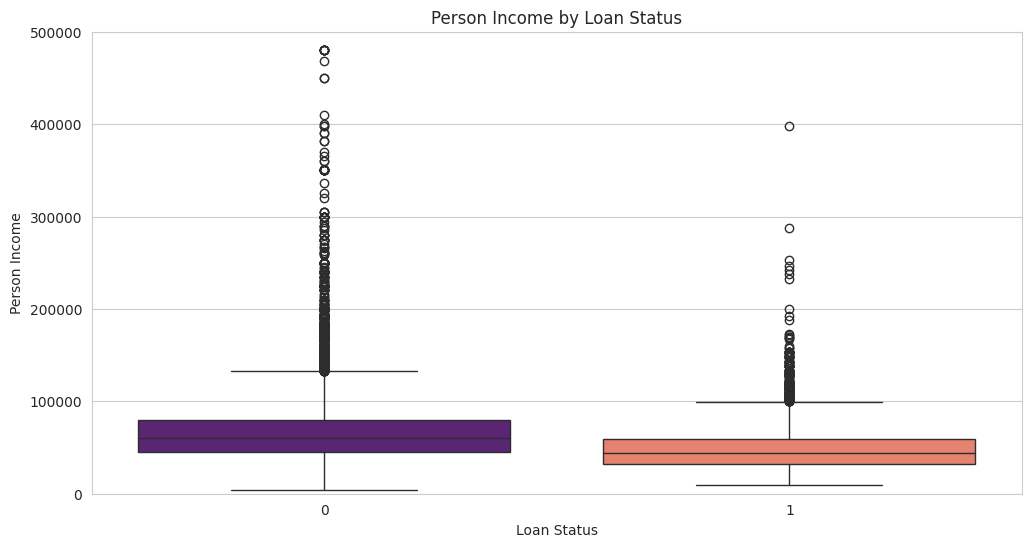

In [385]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loan_status', y='person_income', palette=[colors[1], colors[4]])
plt.title('Person Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylim([0 , 500000])
plt.ylabel('Person Income')

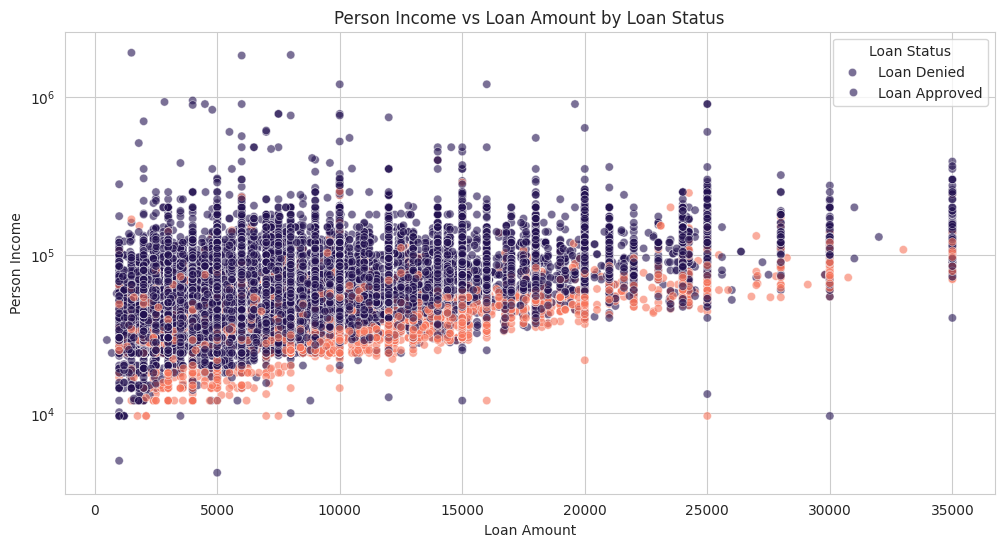

In [386]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df , x='loan_amnt', y='person_income', hue='loan_status', palette=[colors[0], colors[4]] , alpha =0.6)
plt.title('Person Income vs Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.yscale('log')
plt.ylabel('Person Income')
plt.legend(title='Loan Status', labels=['Loan Denied', 'Loan Approved'])

<ipython-input-387-f61ae3a56114>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette=[colors[0], colors[4]])


Text(0, 0.5, 'Loan Intrest Rate')

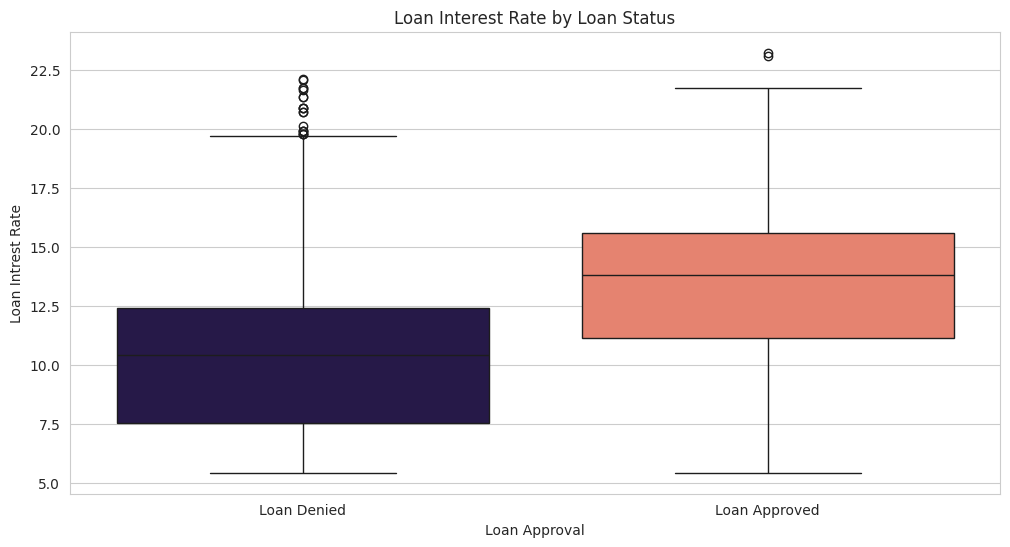

In [387]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette=[colors[0], colors[4]])
plt.title('Loan Interest Rate by Loan Status')
plt.xlabel('Loan Approval')
plt.xticks([0, 1], ['Loan Denied', 'Loan Approved'])
plt.ylabel('Loan Intrest Rate')

<ipython-input-388-8936a57c3fe0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=intent_loan, x='loan_intent', y='loan_status', palette=colors)


Text(0, 0.5, 'Approval Percentage (%)')

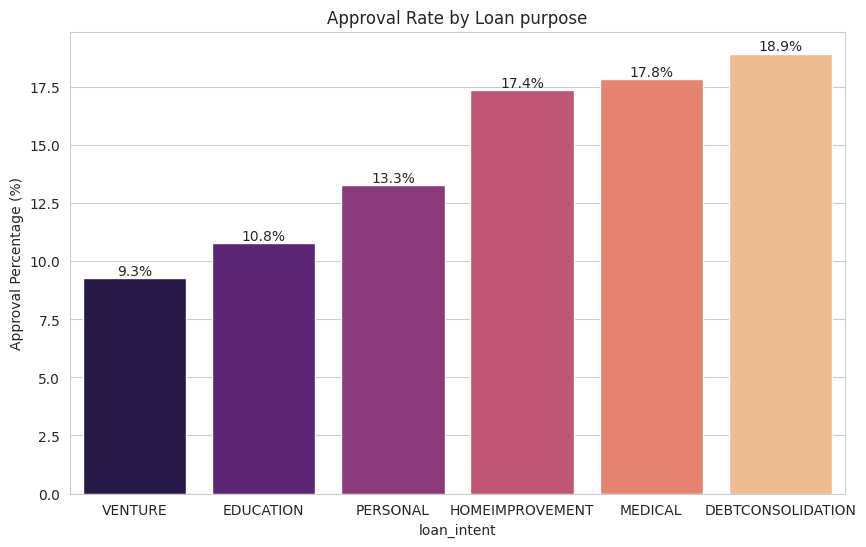

In [388]:
intent_loan = df.groupby('loan_intent')['loan_status'].mean().reset_index().sort_values('loan_status')
intent_loan['loan_status'] = intent_loan['loan_status'] * 100

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=intent_loan, x='loan_intent', y='loan_status', palette=colors)
for ax in fig.containers:
    fig.bar_label(ax, fmt='%.1f%%')

plt.title('Approval Rate by Loan purpose')
plt.ylabel('Approval Percentage (%)')

<ipython-input-389-612f590ae3d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=grade_loan, x='loan_grade', y='loan_status', palette=colors)
<ipython-input-389-612f590ae3d3>:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  fig = sns.barplot(data=grade_loan, x='loan_grade', y='loan_status', palette=colors)


Text(0, 0.5, 'Approval Percentage (%)')

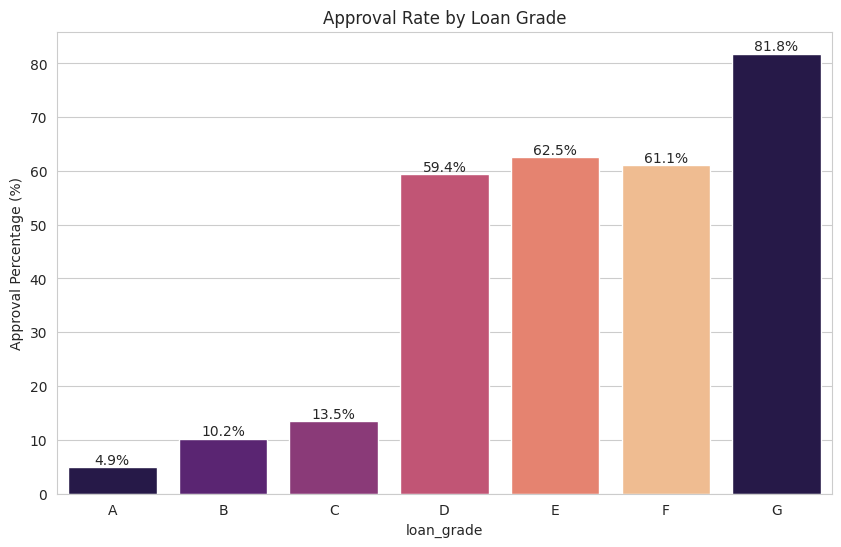

In [389]:
grade_loan = df.groupby('loan_grade')['loan_status'].mean().reset_index()
grade_loan['loan_status'] = grade_loan['loan_status'] * 100

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=grade_loan, x='loan_grade', y='loan_status', palette=colors)
for ax in fig.containers:
    fig.bar_label(ax, fmt='%.1f%%')

plt.title('Approval Rate by Loan Grade')
plt.ylabel('Approval Percentage (%)')

<ipython-input-390-2d4af3d766d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=age_loan, x='age_group', y='loan_status', palette=colors)
<ipython-input-390-2d4af3d766d6>:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  fig = sns.barplot(data=age_loan, x='age_group', y='loan_status', palette=colors)


Text(0, 0.5, 'Approval Percentage (%)')

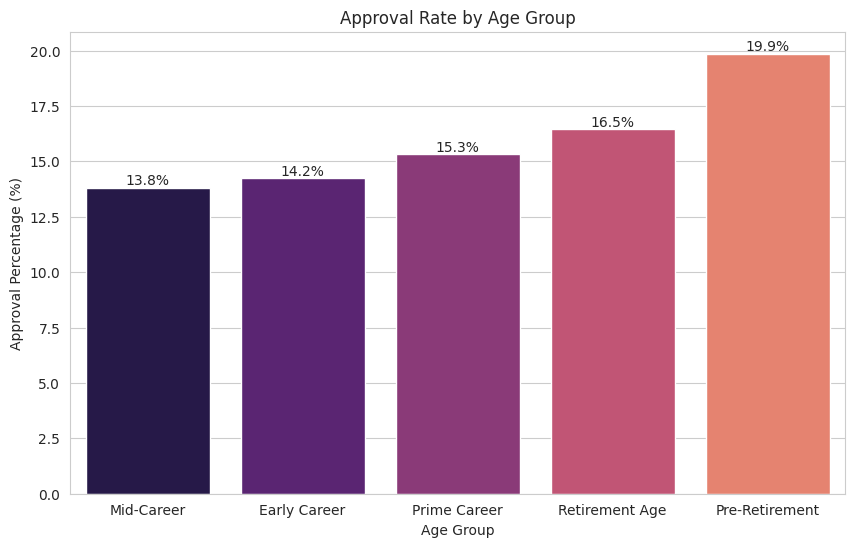

In [390]:
age_loan = df.groupby('age_group')['loan_status'].mean().reset_index().sort_values('loan_status')
age_loan['loan_status'] = age_loan['loan_status'] * 100

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=age_loan, x='age_group', y='loan_status', palette=colors)
for ax in fig.containers:
    fig.bar_label(ax, fmt='%.1f%%')

plt.title('Approval Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Approval Percentage (%)')

<ipython-input-391-fc08ec5c9b6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=cb_loan, x='cb_person_default_on_file', y='loan_status', palette=[colors[0], colors[4]])


Text(0, 0.5, 'Approval Percentage (%)')

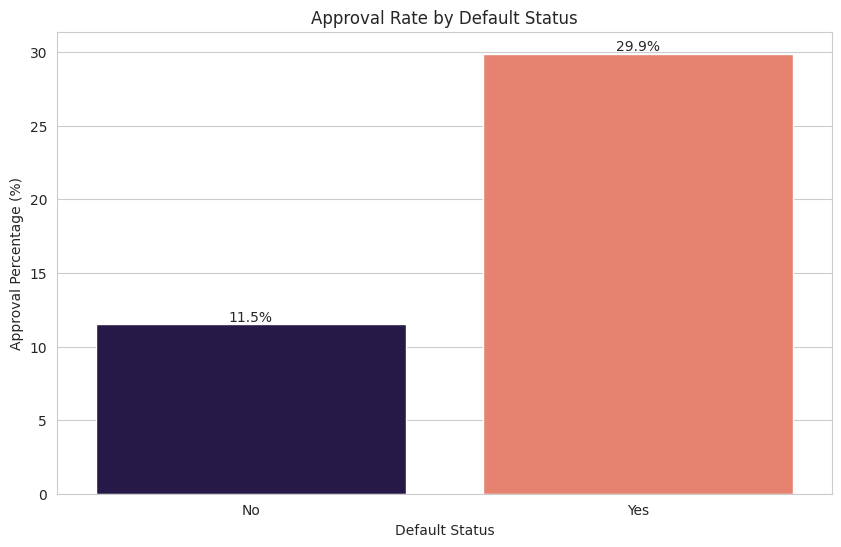

In [391]:
cb_loan = df.groupby('cb_person_default_on_file')['loan_status'].mean().reset_index()
cb_loan['loan_status'] = cb_loan['loan_status'] * 100

plt.figure(figsize=(10, 6))
fig = sns.barplot(data=cb_loan, x='cb_person_default_on_file', y='loan_status', palette=[colors[0], colors[4]])
for ax in fig.containers:
    fig.bar_label(ax, fmt='%.1f%%')

plt.title('Approval Rate by Default Status')
plt.xlabel('Default Status')
plt.xticks([0 , 1] , ['No' , 'Yes'])
plt.ylabel('Approval Percentage (%)')

<Axes: >

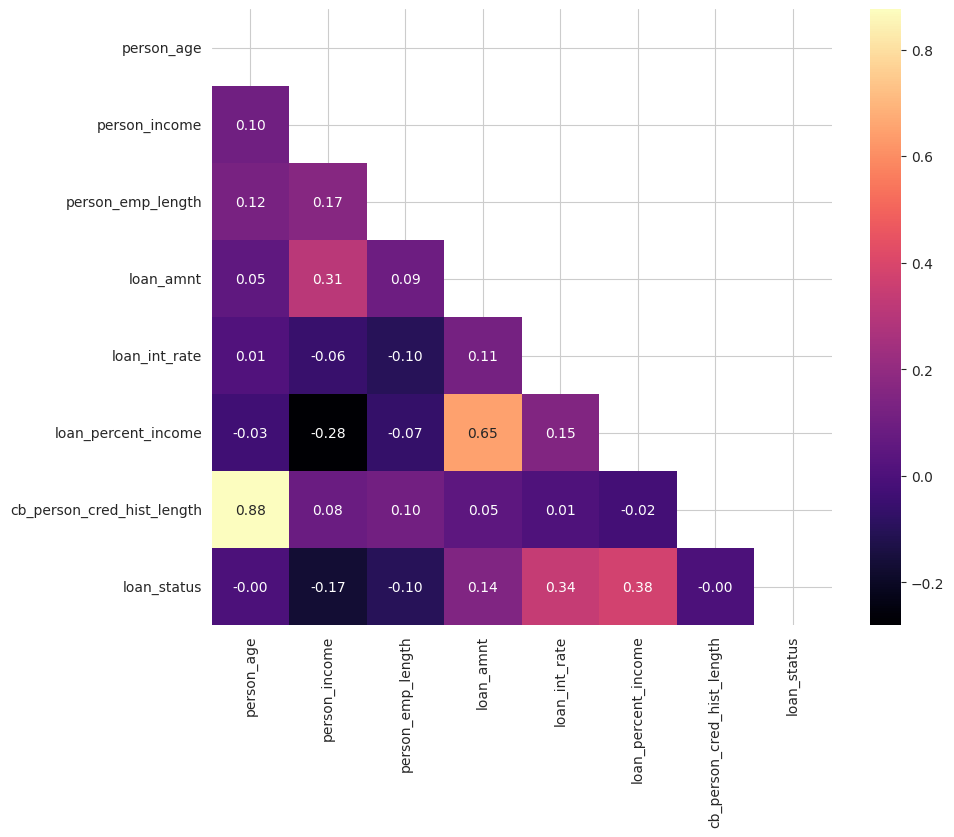

In [392]:
corr = df.corr(numeric_only=True)
mask = np.triu(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt='.2f', annot=True, mask=mask, cmap='magma')

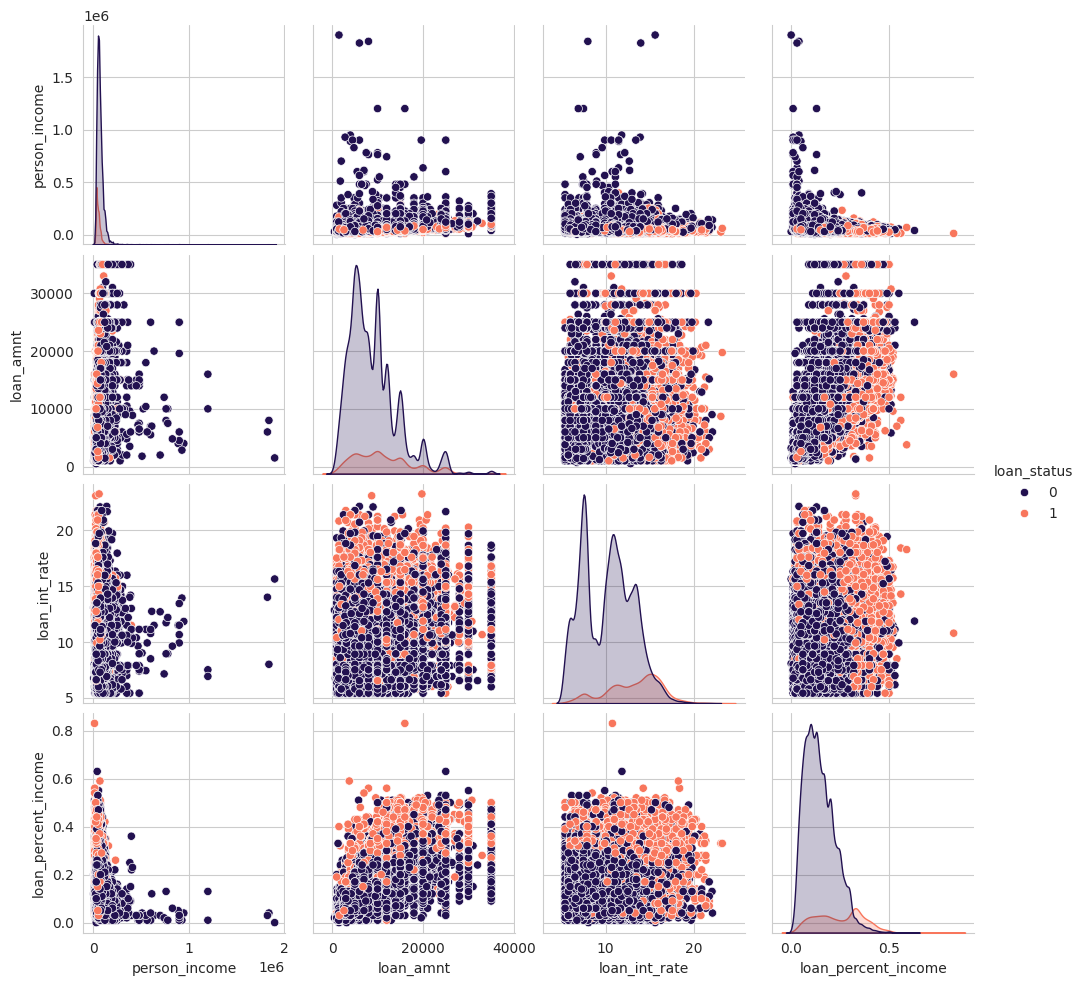

In [393]:
selected_features = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'loan_status']
sns.pairplot(df[selected_features], hue='loan_status', palette=[colors[0], colors[4]])

## Manual Data Encoding

In [396]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
df['loan_grade'] = df['loan_grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [397]:
def feature_eng(df):
    df['int_rate_x_percent_income'] = df['loan_int_rate'] * df['loan_percent_income']
    #df['total_sum'] = df['loan_amnt'] * df['loan_int_rate'] # not accurate

In [398]:
feature_eng(df)

## Data Spliting

In [399]:
X = df.drop(['loan_status' , 'age_group'], axis=1)
y = df['loan_status']

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Data Encoding

In [400]:
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                 'loan_grade', 'int_rate_x_percent_income']

categorical_cols = ['person_home_ownership', 'loan_intent' , 'cb_person_default_on_file']

In [402]:
numerical_pipeline = Pipeline([
    ('power_transform', PowerTransformer(method='yeo-johnson', standardize=True))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first' , handle_unknown='ignore', sparse_output=False))
])

In [403]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, numerical_cols),
        ('categorical', categorical_pipeline, categorical_cols)
    ])

In [404]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [405]:
onehot_cols = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(onehot_cols)

In [406]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [407]:
print(f"Processed training data shape: {X_train_processed_df.shape}")
print(f"Processed testing data shape: {X_test_processed_df.shape}")

Processed training data shape: (46916, 18)
Processed testing data shape: (11729, 18)


In [408]:
print(f"Class distribution in training set: {y_train.value_counts()}")
print(f"Class distribution in testing set: {y_test.value_counts()}")

Class distribution in training set: loan_status
0    40236
1     6680
Name: count, dtype: int64
Class distribution in testing set: loan_status
0    10059
1     1670
Name: count, dtype: int64


## Oversampling

In [409]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_processed_df, y_train) # didnt improve the metrics so i ignored it

## Modeling

In [410]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced' , n_estimators=200),
    'SVM': SVC(class_weight='balanced'),
    'XGBoost': XGBClassifier(max_depth=4, n_estimators=200)
}

In [411]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = 0.0
    return accuracy, precision, recall, f1, auc

In [412]:
results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    metrics = evaluate_model(model, X_test_processed, y_test)
    results[name] = metrics
    print(f"Trained {name}")

Model_metrics = pd.DataFrame.from_dict(results,orient='index',columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

Trained Logistic Regression
Trained Naive Bayes
Trained KNN
Trained Decision Tree
Trained Random Forest
Trained SVM
Trained XGBoost


## Model Evaluation

In [444]:
Model_metrics

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.804075,0.408615,0.840719,0.549941,0.893662
Naive Bayes,0.801091,0.397018,0.765269,0.522806,0.869250
KNN,0.923352,0.837862,0.572455,0.680185,0.867759
Decision Tree,0.914997,0.699941,0.705389,0.702654,0.827593
Random Forest,0.951317,0.938547,0.704192,0.804653,0.933983
SVM,0.898968,0.609679,0.807186,0.694666,0.000000
XGBoost,0.950379,0.902963,0.729940,0.807285,0.956065


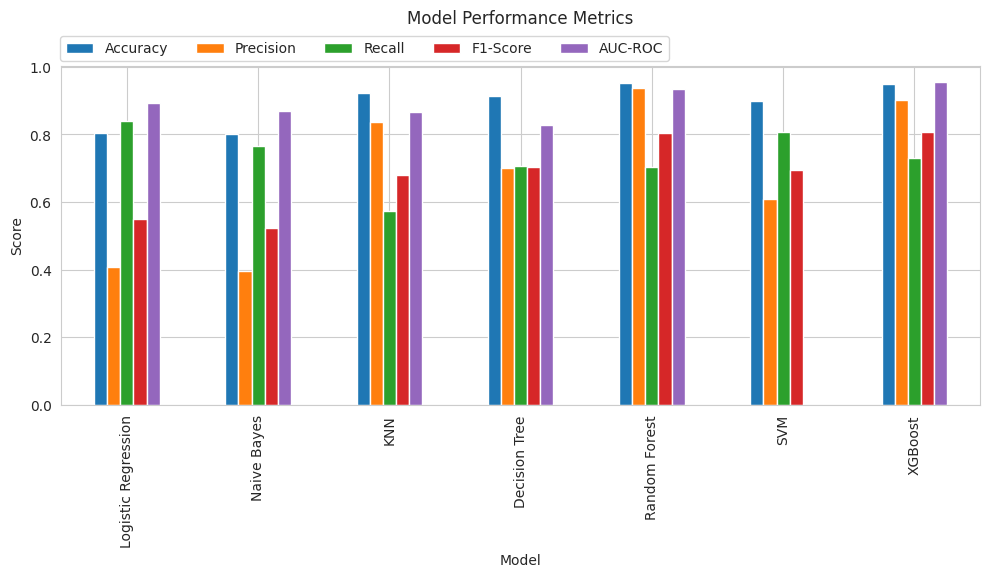

In [414]:
ax = Model_metrics.plot(kind='bar', figsize=(10, 6))
ax.set_title('Model Performance Metrics' , y=1.1)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
plt.tight_layout()
plt.legend(loc='center' ,bbox_to_anchor=[0.33, 1.05], ncol=5)
plt.show()

Best model in terms of F1-Score and AUC-ROC is **XGBoost**

In [415]:
best_model = models['XGBoost']
pred = best_model.predict(X_test_processed)
y_proba = best_model.predict_proba(X_test_processed)[:, 1]

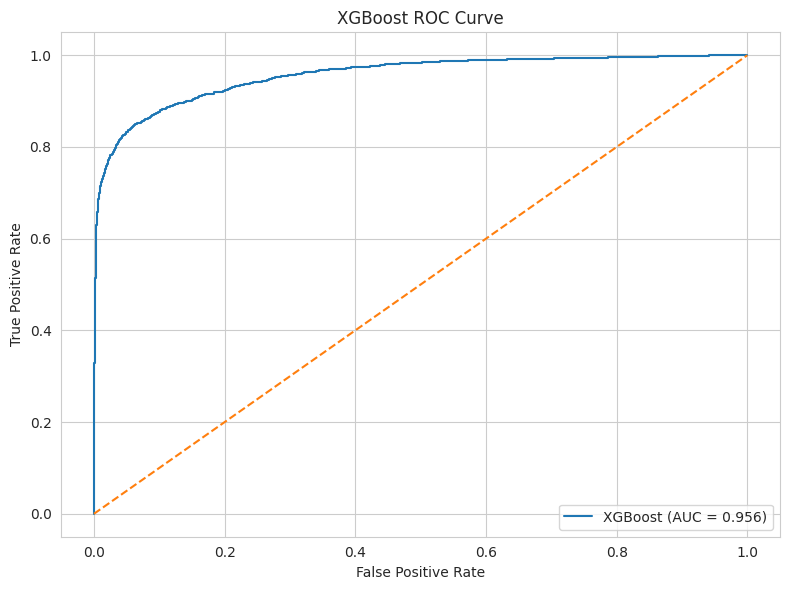

In [418]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

In [419]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10059
           1       0.90      0.73      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



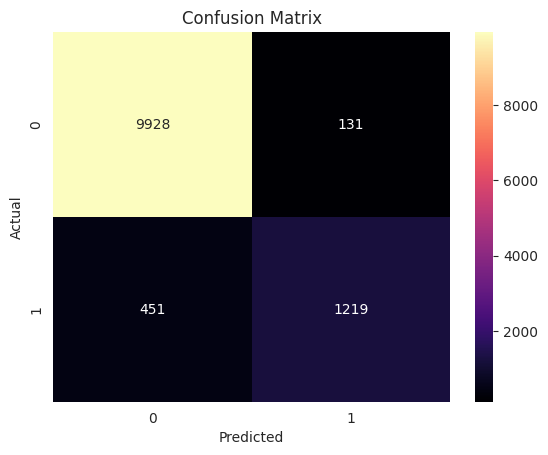

In [420]:
conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [416]:
thresholds = [0.1 , 0.15 , 0.2 , 0.25 , 0.3 , 0.35 , 0.4 , 0.45 , 0.5]
for threshold in thresholds:
    y_pred = (y_proba > threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    print(f"Threshold: {threshold}, Recall Score: {recall}")

Threshold: 0.1, Recall Score: 0.8838323353293414
Threshold: 0.15, Recall Score: 0.8526946107784431
Threshold: 0.2, Recall Score: 0.8323353293413174
Threshold: 0.25, Recall Score: 0.8095808383233533
Threshold: 0.3, Recall Score: 0.7874251497005988
Threshold: 0.35, Recall Score: 0.7718562874251497
Threshold: 0.4, Recall Score: 0.7568862275449102
Threshold: 0.45, Recall Score: 0.7419161676646706
Threshold: 0.5, Recall Score: 0.729940119760479


In [441]:
th_pred = (y_proba > 0.375).astype(int)
print(classification_report(y_test, th_pred))
accuracy = accuracy_score(y_test, th_pred)
precision = precision_score(y_test, th_pred)
recall = recall_score(y_test, th_pred)
f1 = f1_score(y_test, th_pred)
print(accuracy , precision , recall , f1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10059
           1       0.86      0.76      0.81      1670

    accuracy                           0.95     11729
   macro avg       0.91      0.87      0.89     11729
weighted avg       0.95      0.95      0.95     11729

0.9488447437974252 0.8614864864864865 0.7634730538922155 0.8095238095238095


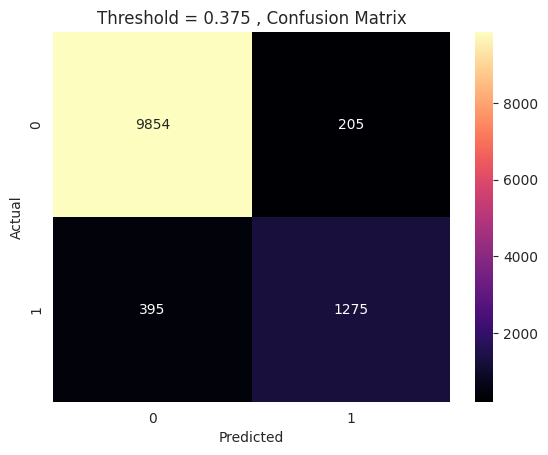

In [442]:
conf = confusion_matrix(y_test, th_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Threshold = 0.375 , Confusion Matrix')
plt.show()

## Feature Importance

In [422]:
RF = models['Random Forest']

In [431]:
RFfeat = pd.DataFrame({'Feature': feature_names, 'Importance': RF.feature_importances_})
RFfeat = RFfeat.sort_values(by='Importance', ascending=False)

In [432]:
XGfeat = pd.DataFrame({'Feature': feature_names, 'Importance': best_model.feature_importances_})
XGfeat = XGfeat.sort_values(by='Importance', ascending=False)

<ipython-input-433-2fc0c48b1e44>:2: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(RFfeat, x='Importance', y='Feature', hue='Feature', palette=colors)


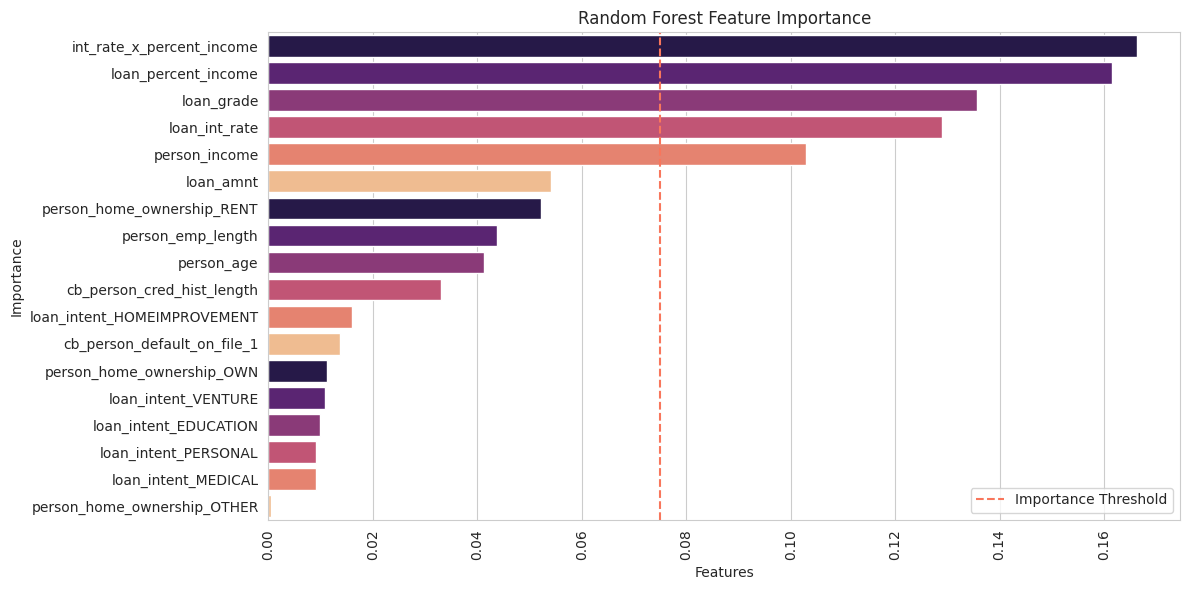

In [433]:
plt.figure(figsize=(12, 6))
sns.barplot(RFfeat, x='Importance', y='Feature', hue='Feature', palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.axvline(x=0.075, color=colors[4], linestyle='--', label='Importance Threshold')
plt.legend()
plt.tight_layout()

<ipython-input-426-d17861328cc8>:2: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(XGfeat, x='Importance', y='Feature', hue = 'Feature' ,palette=colors)


Text(0.5, 1.0, 'XGBoost Feature Importance')

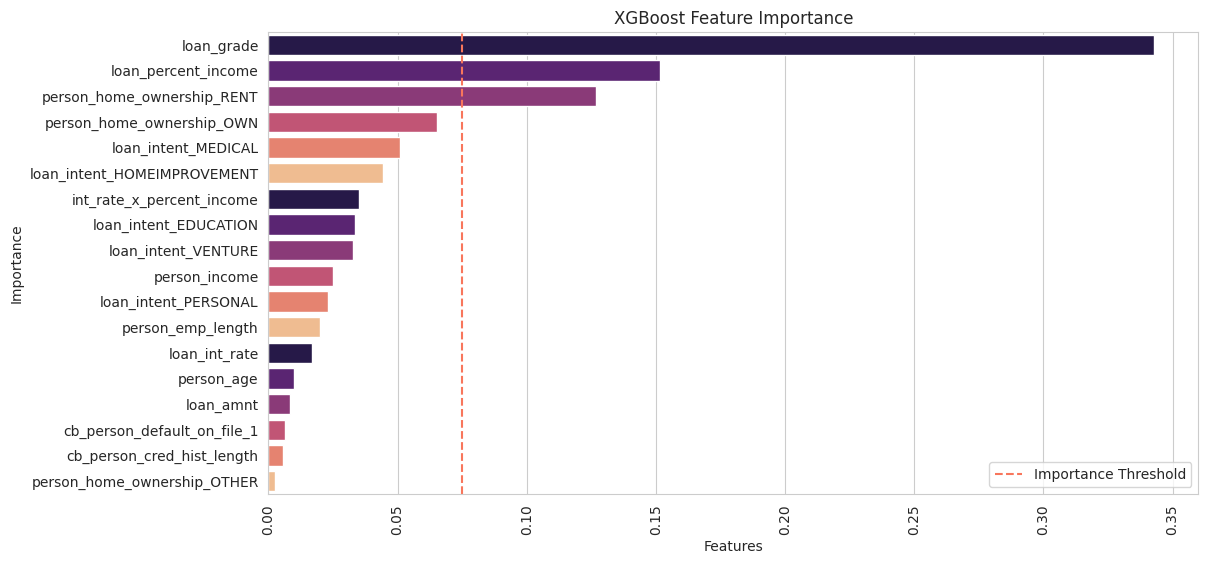

In [426]:
plt.figure(figsize=(12, 6))
sns.barplot(XGfeat, x='Importance', y='Feature', hue = 'Feature' ,palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.axvline(x=0.075, color=colors[4], linestyle='--', label='Importance Threshold')
plt.legend()
plt.title('XGBoost Feature Importance')

## Saving Trained Model and Preprocessor

In [445]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)